# Airline Passenger Satisfaction Analysis

## Introduction

Customer satisfaction is a **critical factor** for the airline industry as it directly impacts customer retention, brand reputation, and profitability. Airlines aim to enhance the overall passenger experience by improving various aspects such as **on-time performance, service quality, in-flight comfort, and airport efficiency**.

This project aims to analyze **passenger satisfaction** using a **survey dataset** that contains customer feedback on different aspects of their travel experience. By leveraging **Exploratory Data Analysis (EDA) and Machine Learning models**, we will identify the key factors that influence passenger satisfaction.

## Project Objectives

The goal of this study is to:
- Understand the **factors that impact passenger satisfaction** using **statistical analysis**.
- Build a **predictive model** to classify passengers as **satisfied or dissatisfied** based on their travel experience.
- Provide **actionable recommendations** to help airlines enhance customer satisfaction.

## Dataset Overview

The dataset contains **passenger survey responses**, including demographic details, travel experience, service ratings, and delays. Our target variable is:

- **Satisfaction**: Whether a passenger is **satisfied** or **neutral/dissatisfied**.

The key independent variables include:
- **Demographics**: Age, gender, type of travel, and class.
- **Flight Experience**: Seat comfort, inflight entertainment, food & drink.
- **Service Quality**: Check-in service, cleanliness, baggage handling.
- **Delays**: Departure delay, arrival delay.

By performing **Exploratory Data Analysis (EDA)**, we will uncover insights that drive customer satisfaction and use **statistical tests** to validate our findings.


## Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Loading the Dataset

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
print("hello")

## Looking at the first 5 rows in the dataset

In [ ]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Data Cleaning

### Checking for the missing values

In [ ]:
print(df.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

### Checking Duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

Number of duplicate rows: 0


There were no duplicate rows in our dataset.

### Encoding the Target Variable: Satisfaction

Since machine learning models work better with **numerical values**, we need to convert the categorical **Satisfaction** column into a binary format:

- **"Satisfied" → 1** (Indicating a positive experience)
- **"Neutral or Dissatisfied" → 0** (Indicating a neutral or negative experience)

This transformation allows us to treat the **Satisfaction** column as a target variable for predictive modeling.


In [ ]:
df['Satisfaction'] = df['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\4120626211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Satisfaction'] = df['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})


### Creating Age Groups for EDA

To analyze **how different age groups impact passenger satisfaction**, we categorize the **Age** column into distinct groups:  

###  Age Group Classification:
| **Age Range**   | **Category**               |
|----------------|---------------------------|
| **0 - 12**     | Children                  |
| **13 - 19**    | Teenagers                 |
| **20 - 35**    | Young Adults              |
| **36 - 55**    | Middle-Aged Adults        |
| **56 - 75**    | Older Adults              |
| **76+**        | Seniors                   |

In [ ]:
#df['Age'].unique()
bins = [0, 13, 20, 36, 56, 76, 100]
labels = ['Children (0-12)', 'Teenagers (13-19)', 'Young Adults (20-35)',
          'Middle-Aged Adults (36-55)', 'Older Adults (56-75)', 'Seniors (76+)']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


### Removing Unnecessary Columns & Reordering Dataset

To streamline our dataset and ensure **efficient analysis**, we:
- **Drop the "ID" column** as it is just an identifier with no analytical value.
- **Drop the "Age" column** since we have already converted it into "Age Group."
- **Reorder the dataset** to place **"Age Group"** near the beginning for better organization.


In [ ]:
df = df.drop(columns=['ID','Age'], axis=1)
cols = list(df.columns)
cols.insert(1, cols.pop(cols.index('Age Group')))
df = df[cols]

# Exploratory Data Analysis (EDA)

## How is passenger satisfaction distributed?

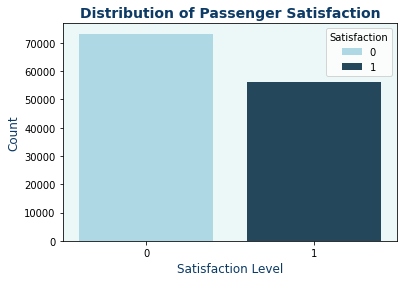

Satisfaction
0    56.550078
1    43.449922
Name: proportion, dtype: float64


In [ ]:
custom_palette = ["#A4DDED", "#1B4965"]
plt.figure(figsize=(6, 4))
sns.countplot(x='Satisfaction', data=df, hue='Satisfaction', palette=custom_palette)
plt.title('Distribution of Passenger Satisfaction', fontsize=14, fontweight="bold", color="#0D3B66")
plt.xlabel('Satisfaction Level', fontsize=12, color="#0D3B66")
plt.ylabel('Count', fontsize=12, color="#0D3B66")
plt.grid(False)
plt.gca().set_facecolor("#ECF8F8")

plt.show()
print(df['Satisfaction'].value_counts(normalize=True) * 100)


More passengers are unsatisfied than satisfied with their airline experience.

## Distribution of Age Groups Among Passengers

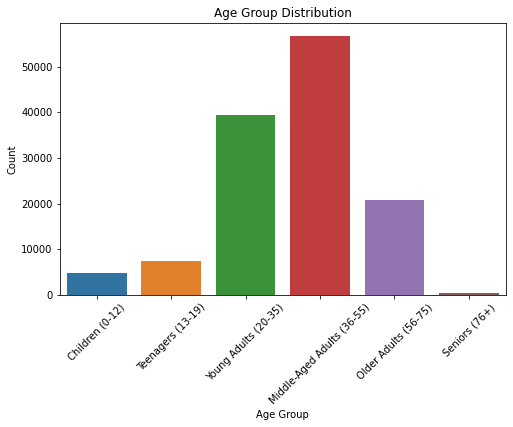

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age Group', data=df, hue='Age Group')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Most passengers belong to the 20-35 and 36-55 age groups, indicating that young-aged and middle-aged adults are the dominant travelers

## Satisfaction Levels Across Different Age Groups

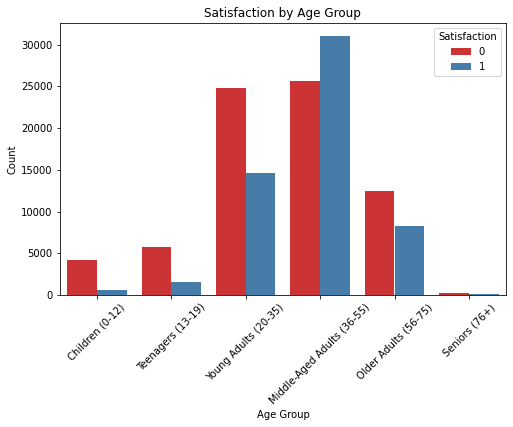

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age Group', hue='Satisfaction', data=df, palette='Set1')
plt.title('Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Satisfaction by Gender Across different Age Groups

C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\2223392111.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\2223392111.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


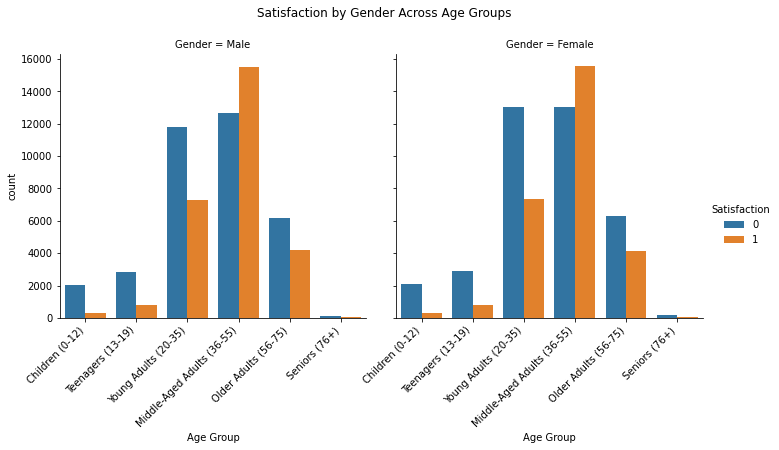

In [ ]:
g = sns.catplot(x='Age Group', hue='Satisfaction', col='Gender', data=df, kind='count', height=5, aspect=1)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Satisfaction by Gender Across Age Groups')
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Both males and females show the highest satisfaction levels in the 36-45 age group, with younger and older age groups having more unsatisfied passengers.

## Distribution of Travel Classes Among Passengers

C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\4176915787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


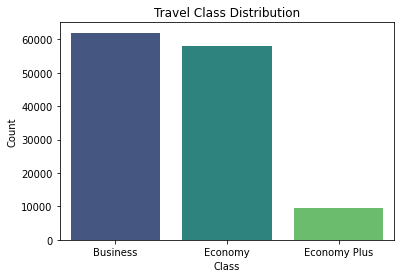

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Travel Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Satisfaction by Travel Class and Type of Travel

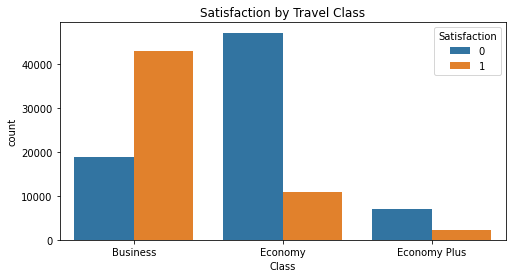

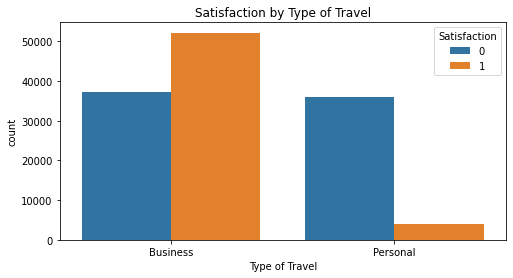

In [ ]:
# By Class
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', hue='Satisfaction', data=df)
plt.title('Satisfaction by Travel Class')
plt.show()

# By Type of Travel
plt.figure(figsize=(8, 4))
sns.countplot(x='Type of Travel', hue='Satisfaction', data=df)
plt.title('Satisfaction by Type of Travel')
plt.show()


## Average Survey Ratings by Satisfaction Level

Heatmap of Correlations (Numerical Variables)

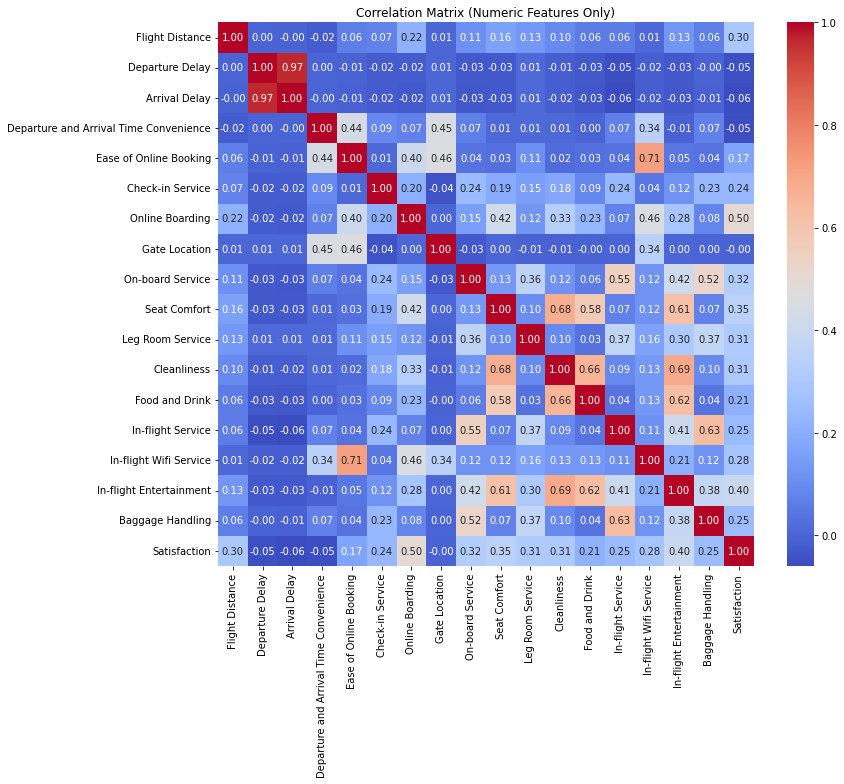

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

In [ ]:
top_corr = corr['Satisfaction'].abs().sort_values(ascending=False)
print(top_corr)

Satisfaction                              1.000000
Online Boarding                           0.501620
In-flight Entertainment                   0.398334
Seat Comfort                              0.348576
On-board Service                          0.322329
Leg Room Service                          0.312557
Cleanliness                               0.306891
Flight Distance                           0.298206
In-flight Wifi Service                    0.283291
Baggage Handling                          0.248651
In-flight Service                         0.245027
Check-in Service                          0.237146
Food and Drink                            0.211164
Ease of Online Booking                    0.168704
Arrival Delay                             0.058275
Departure and Arrival Time Convenience    0.054457
Departure Delay                           0.051032
Gate Location                             0.002923
Name: Satisfaction, dtype: float64


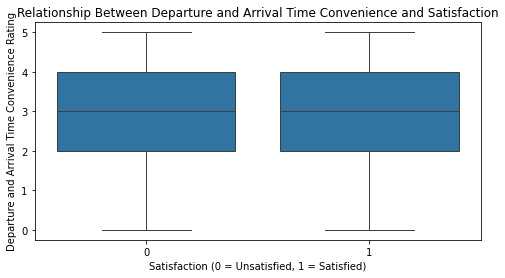

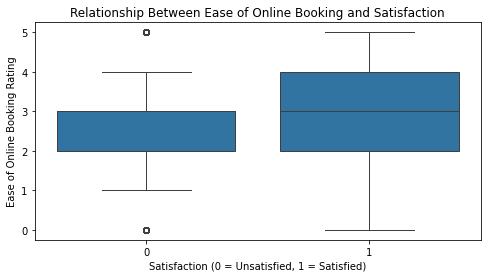

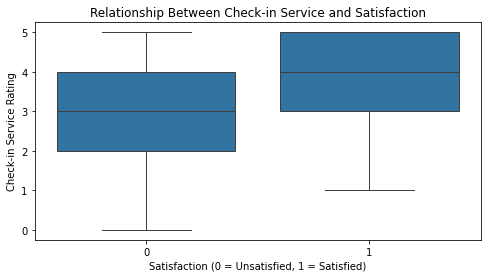

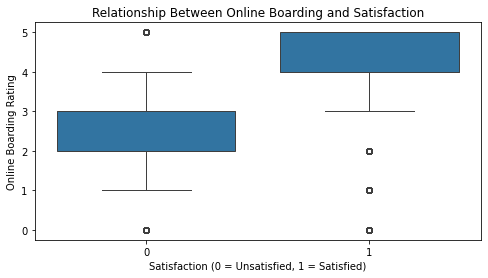

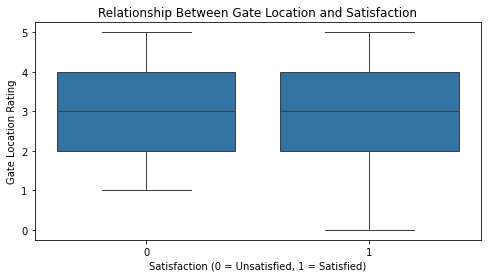

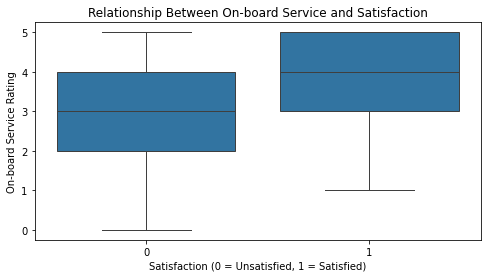

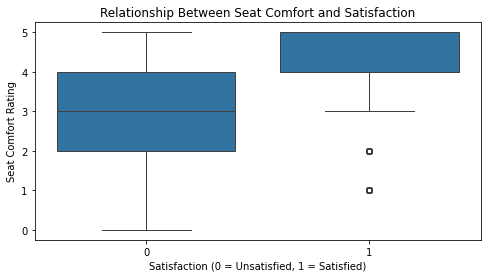

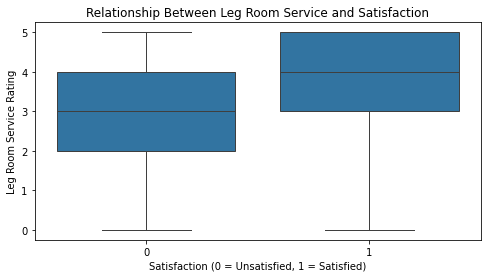

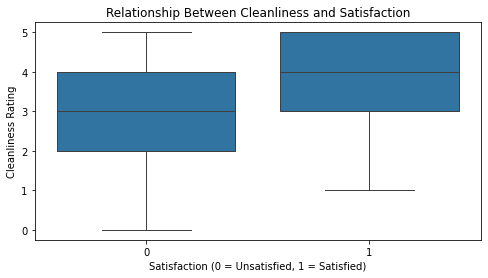

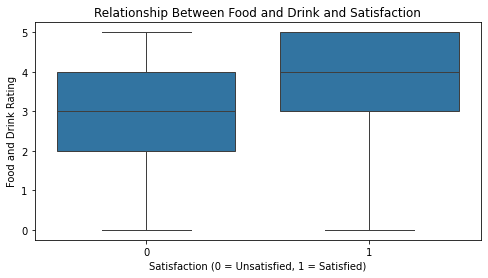

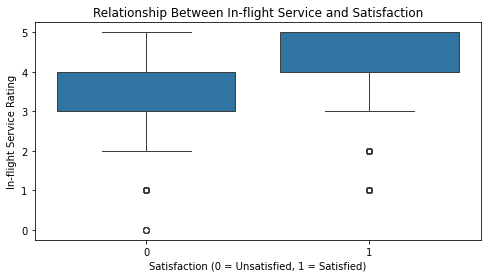

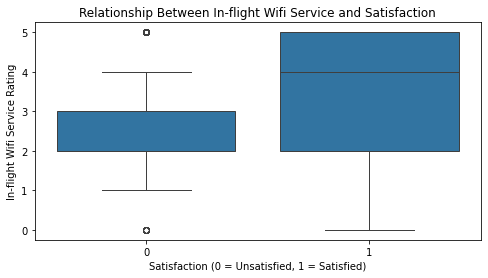

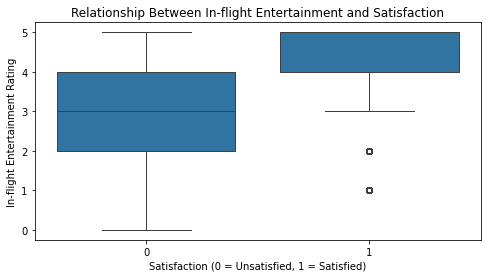

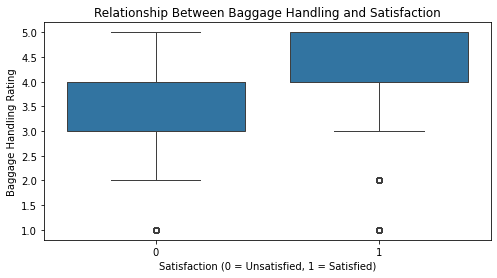

In [ ]:
for col in survey_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Satisfaction', y=col, data=df)
    plt.title(f'Relationship Between {col} and Satisfaction')
    plt.xlabel('Satisfaction (0 = Unsatisfied, 1 = Satisfied)')
    plt.ylabel(f'{col} Rating')
    plt.show()


## Who Are the Passengers? Analyzing Satisfaction Across Age Groups

C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\4202901174.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_satisfaction = df.groupby("Age Group")["Satisfaction"].value_counts(normalize=True).unstack() * 100


<Figure size 576x360 with 0 Axes>

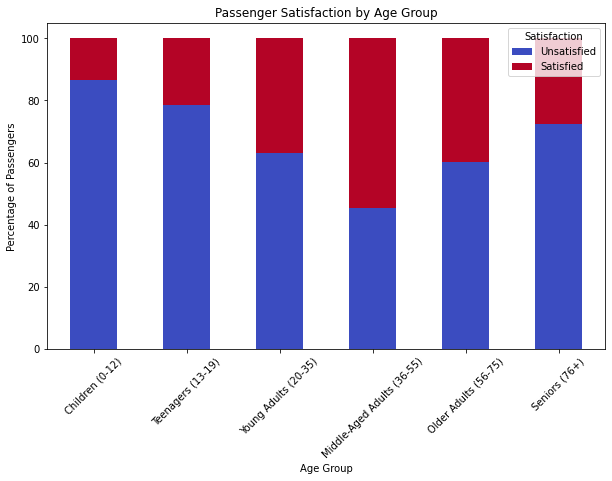

In [ ]:
plt.figure(figsize=(8, 5))
age_satisfaction = df.groupby("Age Group")["Satisfaction"].value_counts(normalize=True).unstack() * 100
age_satisfaction.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))

plt.title("Passenger Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Passengers")
plt.legend(title="Satisfaction", labels=["Unsatisfied", "Satisfied"])
plt.xticks(rotation=45)
plt.show()

- Middle-aged adults (36-55) are the most satisfied group, meaning they have better overall travel experiences.

- Young Adults (20-35) and Older Adults (56-75) show more dissatisfaction, suggesting they may experience more travel-related issues or have higher expectations.

- Children (0-12) and teenagers (13-19) have the highest dissatisfaction rates, meaning they are the least happy travelers.

- Seniors (76+) have around 25% satisfaction, meaning they are not the most satisfied but still better than children and teenagers.

## How Does Experience Level Affect Satisfaction? (First-Time vs. Returning Flyers)

<Figure size 576x360 with 0 Axes>

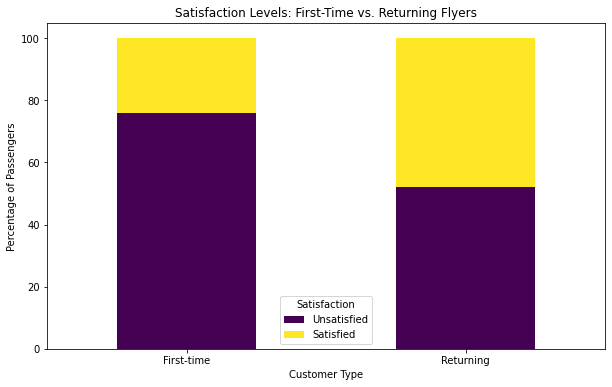

In [ ]:
plt.figure(figsize=(8, 5))
customer_satisfaction = df.groupby("Customer Type")["Satisfaction"].value_counts(normalize=True).unstack() * 100
customer_satisfaction.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

plt.title("Satisfaction Levels: First-Time vs. Returning Flyers")
plt.xlabel("Customer Type")
plt.ylabel("Percentage of Passengers")
plt.legend(title="Satisfaction", labels=["Unsatisfied", "Satisfied"])
plt.xticks(rotation=0)
plt.show()

- Returning flyers have a significantly higher satisfaction rate compared to first-time flyers.

- First-time flyers are more likely to be dissatisfied, possibly due to unmet expectations, lack of familiarity with the airline, or overall travel stress.

- The difference is clear—loyal customers (returning flyers) tend to be more satisfied, while new travelers struggle more.

Experience matters! Returning passengers know what to expect, leading to higher satisfaction, while first-time travelers might need extra attention to ensure a smooth and positive journey.

## How Does Travel Class Affect Passenger Satisfaction?

<Figure size 576x360 with 0 Axes>

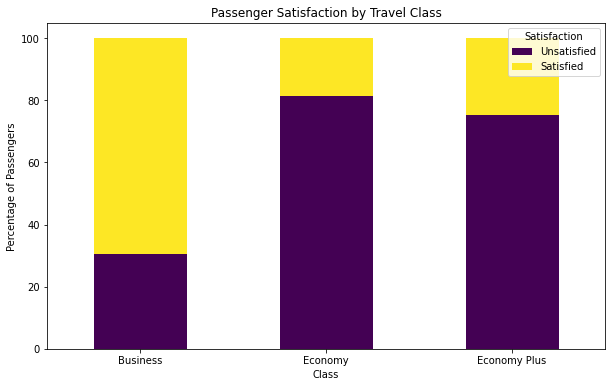

In [ ]:
plt.figure(figsize=(8, 5))
class_satisfaction = df.groupby("Class")["Satisfaction"].value_counts(normalize=True).unstack() * 100
class_satisfaction.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

plt.title("Passenger Satisfaction by Travel Class")
plt.xlabel("Class")
plt.ylabel("Percentage of Passengers")
plt.legend(title="Satisfaction", labels=["Unsatisfied", "Satisfied"])
plt.xticks(rotation=0)
plt.show()

- Business class passengers have the highest satisfaction levels, indicating a premium experience with better comfort and services.

- Economy class passengers are the least satisfied, likely due to limited space, fewer amenities, and overall lower service quality.

- Premium economy falls in between, showing more dissatisfaction than business class but better satisfaction than regular economy.

The better the class, the better the experience! Airlines can boost customer happiness by making economy class more comfortable while continuing to provide top-tier experiences in premium cabins.

### Hypotheses Testing

Reading the dataset again, and preprocessing it.

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df = df.dropna()
df = df.drop(columns='ID')
df['Class'].unique()
df['Satisfaction'] = df['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
df['Satisfaction'] = df['Satisfaction'].astype('category')


C:\Users\Vineet Patel\AppData\Local\Temp\ipykernel_3792\3398152278.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Satisfaction'] = df['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})


## Chi-Square Test: Assessing the Relationship Between Categorical Features and Satisfaction  

### **Why Use the Chi-Square Test?**  
The **Chi-Square test for independence** helps determine whether two **categorical variables** are statistically related.  
In this analysis, we test **whether passenger satisfaction depends on key categorical features**:

- **Gender**
- **Customer Type (First-time vs. Returning Flyer)**
- **Type of Travel (Personal vs. Business)**
- **Class (Economy, Business, etc.)**

### **Hypotheses for Each Test:**  
For each categorical variable, we define the following hypotheses:  

- **H₀:** *The categorical variable and satisfaction are independent (no relationship).*  
- **H₁:** *The categorical variable and satisfaction are dependent (there is a relationship).*


In [ ]:
categorical_vars = ["Gender", "Customer Type", "Type of Travel", "Class"]
chi2_results = {}

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["Satisfaction"])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[var] = {"Chi-Square": chi2, "p-value": p}

    print(f"\nChi-Square Test for {var} vs. Satisfaction")
    print(f"H₀: {var} and Satisfaction are independent (no relationship).")
    print(f"H₁: {var} affects Satisfaction (there is a relationship).")
    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"P-value: {p:.5f}")

    if p < 0.05:
        print(f"Reject H₀ → {var} significantly impacts Satisfaction.")
    else:
        print(f"Fail to Reject H₀ → No significant impact of {var} on Satisfaction.")

chi2_df = pd.DataFrame(chi2_results).T



Chi-Square Test for Gender vs. Satisfaction
H₀: Gender and Satisfaction are independent (no relationship).
H₁: Gender affects Satisfaction (there is a relationship).
Chi-Square Statistic: 17.07
P-value: 0.00004
Reject H₀ → Gender significantly impacts Satisfaction.

Chi-Square Test for Customer Type vs. Satisfaction
H₀: Customer Type and Satisfaction are independent (no relationship).
H₁: Customer Type affects Satisfaction (there is a relationship).
Chi-Square Statistic: 4475.16
P-value: 0.00000
Reject H₀ → Customer Type significantly impacts Satisfaction.

Chi-Square Test for Type of Travel vs. Satisfaction
H₀: Type of Travel and Satisfaction are independent (no relationship).
H₁: Type of Travel affects Satisfaction (there is a relationship).
Chi-Square Statistic: 26195.14
P-value: 0.00000
Reject H₀ → Type of Travel significantly impacts Satisfaction.

Chi-Square Test for Class vs. Satisfaction
H₀: Class and Satisfaction are independent (no relationship).
H₁: Class affects Satisfacti

## Chi-Square Test Results: Categorical Features & Satisfaction  

The **Chi-Square test for independence** was performed to determine whether passenger satisfaction is significantly associated with key categorical variables.

| **Categorical Variable** | **Chi-Square Statistic** | **P-Value** | **Decision** | **Interpretation** |
|------------------------|------------------------|------------|--------------|-----------------|
| **Gender vs. Satisfaction** | 17.07 | **0.00004** | Reject H₀ | Gender significantly affects satisfaction, but the effect may be small. |
| **Customer Type vs. Satisfaction** | 4475.16 | **0.00000** | Reject H₀ | **Customer Type has a very strong impact on Satisfaction**. Returning flyers are much more satisfied than first-time flyers. |
| **Type of Travel vs. Satisfaction** | 26195.14 | **0.00000** | Reject H₀ | **Type of Travel has a major effect on Satisfaction**. Business travelers are significantly more satisfied than personal travelers. |
| **Class vs. Satisfaction** | 32823.12 | **0.00000** | Reject H₀ | **Travel Class is the strongest predictor of Satisfaction**. Business-class passengers are much more satisfied than Economy-class passengers. |

---

### **Key Insights**
✔ **Gender has a statistically significant impact on satisfaction**, but the effect is relatively weak compared to other variables (**low Chi-Square value**).  

✔ **Customer Type, Type of Travel, and Class are much stronger predictors of satisfaction** (Very **high Chi-Square values and p-values near 0**).  
   - Returning customers are **more satisfied** than first-time travelers.  
   - Business travelers report **much higher satisfaction** than personal travelers.  
   - **Passengers in Business Class are the most satisfied**, while Economy passengers report **lower satisfaction levels**.  

✔ **Class has the strongest relationship with satisfaction**, followed by **Type of Travel and Customer Type**.  


## T-Test: Assessing the Significance of Numerical Variables  

### **Why Use the T-Test?**  
The **Independent Samples T-Test** is used to determine whether the means of a **numerical variable** differ significantly between **satisfied and unsatisfied passengers**.  
This helps identify which numerical factors (e.g., **Flight Distance, Delays, Service Ratings**) contribute most to passenger satisfaction.

### **Hypotheses for Each Test:**  
For each numerical variable, we define the following hypotheses:  

- **H₀:** *There is no significant difference in [Variable] between satisfied and unsatisfied passengers.*  
- **H₁:** *There is a significant difference in [Variable] between satisfied and unsatisfied passengers.*  

In [ ]:
import pandas as pd
import scipy.stats as stats

numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "Satisfaction" in numerical_vars:
    numerical_vars.remove("Satisfaction")

t_test_results = {}

for var in numerical_vars:
    print(f"\nHypothesis Test for {var}:")
    print(f"H₀: There is no significant difference in {var} between satisfied and unsatisfied passengers.")
    print(f"H₁: There is a significant difference in {var} between satisfied and unsatisfied passengers.")
    t_stat, p_value = stats.ttest_ind(
        df[df["Satisfaction"] == 1][var],
        df[df["Satisfaction"] == 0][var],
        equal_var=False
    )
    t_test_results[var] = {"T-Statistic": t_stat, "P-Value": p_value}

    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.5f}")

    if p_value < 0.05:
        print(f"Reject H₀: {var} significantly differs between satisfied and unsatisfied passengers.")
    else:
        print(f"Fail to reject H₀: No significant difference in {var} between satisfied and unsatisfied passengers.")
t_test_df = pd.DataFrame(t_test_results).T

#print("\nFinal T-Test Results:")
#print(t_test_df)



Hypothesis Test for Age:
H₀: There is no significant difference in Age between satisfied and unsatisfied passengers.
H₁: There is a significant difference in Age between satisfied and unsatisfied passengers.
T-Statistic: 50.26
P-Value: 0.00000
Reject H₀: Age significantly differs between satisfied and unsatisfied passengers.

Hypothesis Test for Flight Distance:
H₀: There is no significant difference in Flight Distance between satisfied and unsatisfied passengers.
H₁: There is a significant difference in Flight Distance between satisfied and unsatisfied passengers.
T-Statistic: 107.52
P-Value: 0.00000
Reject H₀: Flight Distance significantly differs between satisfied and unsatisfied passengers.

Hypothesis Test for Departure Delay:
H₀: There is no significant difference in Departure Delay between satisfied and unsatisfied passengers.
H₁: There is a significant difference in Departure Delay between satisfied and unsatisfied passengers.
T-Statistic: -18.72
P-Value: 0.00000
Reject H₀: De

## 📊 T-Test Results: Numerical Features & Satisfaction  

The **Independent Samples T-Test** was performed to determine whether the means of numerical variables significantly differ between **satisfied and unsatisfied passengers**.

| **Numerical Variable** | **T-Statistic** | **P-Value** | **Decision** | **Interpretation** |
|------------------------|---------------|------------|--------------|-----------------|
| **Age** | 50.26 | **0.00000** | Reject H₀ | Age significantly differs between satisfied and unsatisfied passengers. |
| **Flight Distance** | 107.52 | **0.00000** | Reject H₀ | Flight Distance significantly differs between satisfaction groups. |
| **Departure Delay** | -18.72 | **0.00000** | Reject H₀ | Departure Delays negatively impact passenger satisfaction. |
| **Arrival Delay** | -21.37 | **0.00000** | Reject H₀ | Arrival Delays significantly affect passenger satisfaction. |
| **Departure and Arrival Time Convenience** | -19.53 | **0.00000** | Reject H₀ | Timing convenience significantly influences satisfaction. |
| **Ease of Online Booking** | 59.52 | **0.00000** | Reject H₀ | Ease of online booking has a significant impact on satisfaction. |
| **Check-in Service** | 89.01 | **0.00000** | Reject H₀ | Check-in Service significantly influences passenger satisfaction. |
| **Online Boarding** | 207.52 | **0.00000** | Reject H₀ | **Online Boarding is the strongest numerical predictor of satisfaction.** |
| **Gate Location** | -1.03 | **0.30145** | Fail to Reject H₀ ❌ | Gate Location **does not significantly impact satisfaction**. |
| **On-board Service** | 124.59 | **0.00000** | Reject H₀ | On-board Service significantly differs between satisfaction groups. |
| **Seat Comfort** | 136.15 | **0.00000** | Reject H₀ | Seat Comfort is highly correlated with satisfaction. |
| **Leg Room Service** | 120.02 | **0.00000** | Reject H₀ | More legroom leads to higher satisfaction. |
| **Cleanliness** | 118.29 | **0.00000** | Reject H₀ | Cleanliness is a major factor in passenger satisfaction. |
| **Food and Drink** | 78.63 | **0.00000** | Reject H₀ | Food and Drink quality significantly influences satisfaction. |
| **In-flight Service** | 91.83 | **0.00000** | Reject H₀ | In-flight Service is a key factor in satisfaction. |
| **In-flight Wifi Service** | 100.04 | **0.00000** | Reject H₀ | Wifi availability is significantly related to satisfaction. |
| **In-flight Entertainment** | 160.46 | **0.00000** | Reject H₀ | **In-flight Entertainment is a major factor in satisfaction.** |
| **Baggage Handling** | 93.18 | **0.00000** | Reject H₀ | Baggage Handling significantly affects satisfaction. |

---

### **Key Insights**
✔ **Online Boarding, In-flight Entertainment, Seat Comfort, and Cleanliness are the most significant factors affecting satisfaction** (Highest T-Statistic).  
✔ **Gate Location is NOT a significant factor** (P-value > 0.05). It can be removed from further analysis.  
✔ **Departure and Arrival Delays negatively impact satisfaction**, confirming that punctuality is important to passengers.  
✔ **In-flight Services, Food & Drink, and Leg Room contribute significantly** to the passenger experience.  

---


In [ ]:
df = df.drop(columns='Gate Location')

## Multicollinearity Check: Variance Inflation Factor (VIF)

### **Why Check for Multicollinearity?**  
- Multicollinearity occurs when **two or more independent variables are highly correlated**, leading to unstable regression models.  
- **Variance Inflation Factor (VIF)** measures how much a variable is **inflated by its correlation** with other features.  
- **A high VIF (> 5)** indicates a variable that should be **removed or transformed** to improve model performance.

### **Interpretation of VIF Values**
| **VIF Value**  | **Interpretation** |
|---------------|------------------|
| **VIF < 5**   | Low multicollinearity (Good) |
| **VIF 5 - 10** | Moderate multicollinearity (Needs Attention) |
| **VIF > 10**  | High multicollinearity (Should Be Removed) |

In [ ]:
num_features = df.select_dtypes(include=['float64', 'int64'])

X = add_constant(num_features)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

high_vif = vif_data[vif_data["VIF"] > 5]
if not high_vif.empty:
    print("Warning: Some features have high multicollinearity and may need to be removed.")


                                   Feature        VIF
0                                    const  35.260104
1                                      Age   1.095906
2                          Flight Distance   1.094156
3                          Departure Delay  14.668085
4                            Arrival Delay  14.680872
5   Departure and Arrival Time Convenience   1.324968
6                   Ease of Online Booking   2.429360
7                         Check-in Service   1.213786
8                          Online Boarding   1.792923
9                         On-board Service   1.756404
10                            Seat Comfort   2.369595
11                        Leg Room Service   1.300749
12                             Cleanliness   2.849333
13                          Food and Drink   2.167197
14                       In-flight Service   2.062442
15                  In-flight Wifi Service   2.377290
16                 In-flight Entertainment   3.800636
17                        Ba

### Removing the Arrival Delay Column from the dataset.

In [ ]:
df = df.drop(columns=['Arrival Delay'])

# Recalculate VIF after removing the feature
num_features = df.select_dtypes(include=['float64', 'int64'])
X = add_constant(num_features)

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\n**Updated Variance Inflation Factor (VIF) Values:**")
print(vif_data.to_string(index=False))



**Updated Variance Inflation Factor (VIF) Values:**
                               Feature       VIF
                                 const 35.199044
                                   Age  1.095855
                       Flight Distance  1.094043
                       Departure Delay  1.007360
Departure and Arrival Time Convenience  1.324967
                Ease of Online Booking  2.429356
                      Check-in Service  1.213771
                       Online Boarding  1.792898
                      On-board Service  1.756335
                          Seat Comfort  2.369529
                      Leg Room Service  1.300741
                           Cleanliness  2.849323
                        Food and Drink  2.166952
                     In-flight Service  2.061367
                In-flight Wifi Service  2.377289
               In-flight Entertainment  3.800425
                      Baggage Handling  1.895559


## Setting up data for Machine Learning Modellings


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  object  
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  object  
 3   Type of Travel                          129880 non-null  object  
 4   Class                                   129880 non-null  object  
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Departure and Arrival Time Convenience  129880 non-null  category
 8   Ease of Online Booking                  129880 non-null  category
 9   Check-in Service                        129880 non-null  category
 10  Online Boarding                 

In [ ]:
# Define numerical values
numerical_values = ['Age',
                    'Flight Distance',
                    'Departure Delay']
numerical_columns = df.loc[:, numerical_values]
numerical_columns.describe()

,Age,Flight Distance,Departure Delay
count,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713
std,15.119360,997.452477,38.071126
min,7.000000,31.000000,0.000000
25%,27.000000,414.000000,0.000000
50%,40.000000,844.000000,0.000000
75%,51.000000,1744.000000,12.000000
max,85.000000,4983.000000,1592.000000


In [ ]:
# Define categorical values with
categorical_values = ['Gender',
                      'Customer Type',
                      'Type of Travel',
                      'Class',
                      'Departure and Arrival Time Convenience',
                      'Ease of Online Booking',
                      'Check-in Service',
                      'Online Boarding',
                      'Gate Location',
                      'On-board Service',
                      'Seat Comfort',
                      'Leg Room Service',
                      'Cleanliness',
                      'Food and Drink',
                      'In-flight Service',
                      'In-flight Wifi Service',
                      'In-flight Entertainment',
                      'Baggage Handling']
categorical_columns = df.loc[:, categorical_values]
categorical_columns.describe()

,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,6,6,6,5
top,Female,Returning,Business,Business,4,3,4,4,3,4,4,4,4,4,4,2,4,4
freq,65899,106100,89693,62160,31880,30393,36333,38468,35717,38703,39756,35886,33969,30563,47323,32320,36791,46761


In [ ]:
# Add necessary machine learning libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error


In [ ]:
# Define X and y for all models
X_num = df.drop(columns=['Gender',
                         'Customer Type',
                         'Type of Travel',
                         'Class',
                         'Departure and Arrival Time Convenience',
                         'Ease of Online Booking',
                         'Check-in Service',
                         'Online Boarding',
                         'Gate Location',
                         'On-board Service',
                         'Seat Comfort',
                         'Leg Room Service',
                         'Cleanliness',
                         'Food and Drink',
                         'In-flight Service',
                         'In-flight Wifi Service',
                         'In-flight Entertainment',
                         'Baggage Handling',
                         'Satisfaction'])
X_cat = df.drop(columns=['Age',
                         'Flight Distance',
                         'Departure Delay',
                         'Satisfaction'])
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']


# Make dictionaries of Classifiers
models = {
    'Linear Discriminant Analysis': LDA(solver='lsqr', shrinkage='auto'),
    'Quadratic Discriminant Analysis': QDA(reg_param=0.1),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()}


# Preprocessers that uses StandardScaler AND/ OR OneHotEncoder
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_values) ])

preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_values) ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_values),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_values) ])

# Test/training datasets
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.2, random_state=22)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.2, random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


Linear Discriminant Analysis Results: 

Model Accuracy: 0.6584 

RMSE: 0.5845
Confusion Matrix: 
 [[12165  2532]
 [ 6341  4938]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.83      0.73     14697
           1       0.66      0.44      0.53     11279

    accuracy                           0.66     25976
   macro avg       0.66      0.63      0.63     25976
weighted avg       0.66      0.66      0.64     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.65856945 0.66365106 0.66080228 0.65818448 0.66037881] 

Mean Cross-Validation Accuracy: 0.6603 ± 0.0019 



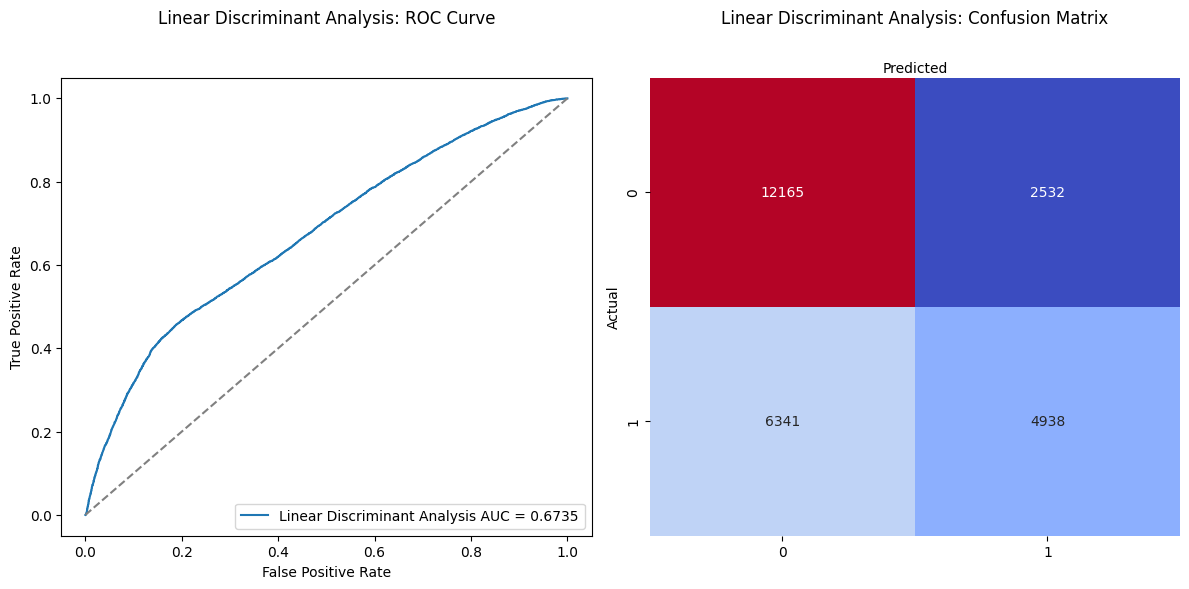


Quadratic Discriminant Analysis Results: 

Model Accuracy: 0.6711 

RMSE: 0.5735
Confusion Matrix: 
 [[12624  2073]
 [ 6470  4809]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75     14697
           1       0.70      0.43      0.53     11279

    accuracy                           0.67     25976
   macro avg       0.68      0.64      0.64     25976
weighted avg       0.68      0.67      0.65     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.66869418 0.67439175 0.67342932 0.67069603 0.67096551] 

Mean Cross-Validation Accuracy: 0.6716 ± 0.0020 



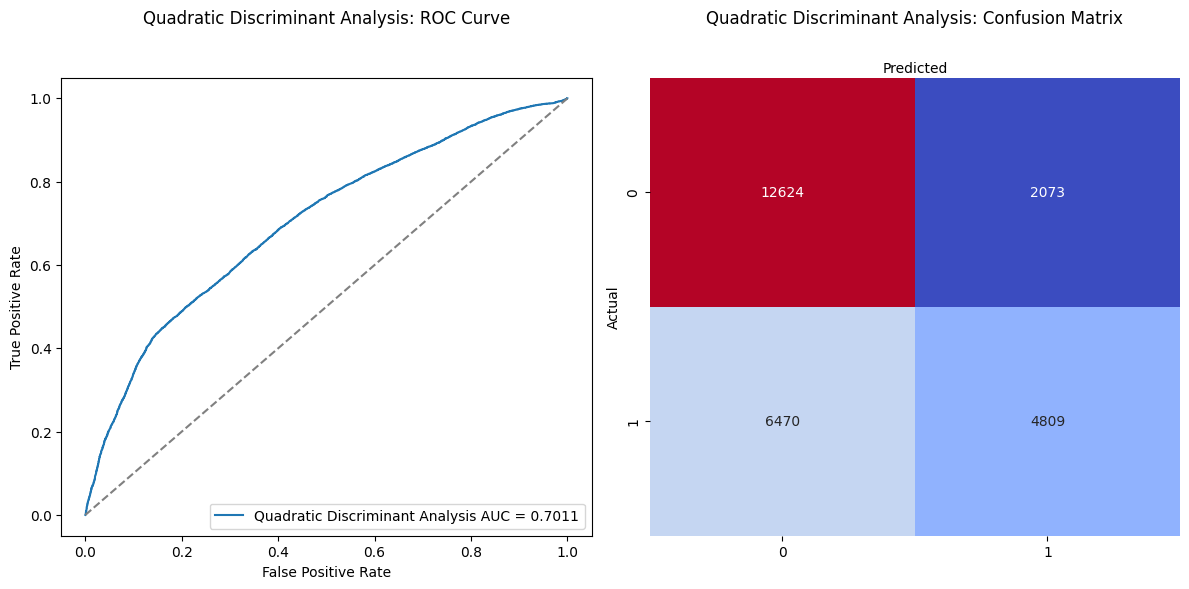


Gaussian Naive Bayes Results: 

Model Accuracy: 0.6711 

RMSE: 0.5735
Confusion Matrix: 
 [[12601  2096]
 [ 6447  4832]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75     14697
           1       0.70      0.43      0.53     11279

    accuracy                           0.67     25976
   macro avg       0.68      0.64      0.64     25976
weighted avg       0.68      0.67      0.65     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.66873268 0.67435325 0.67354481 0.67058054 0.67073452] 

Mean Cross-Validation Accuracy: 0.6716 ± 0.0021 



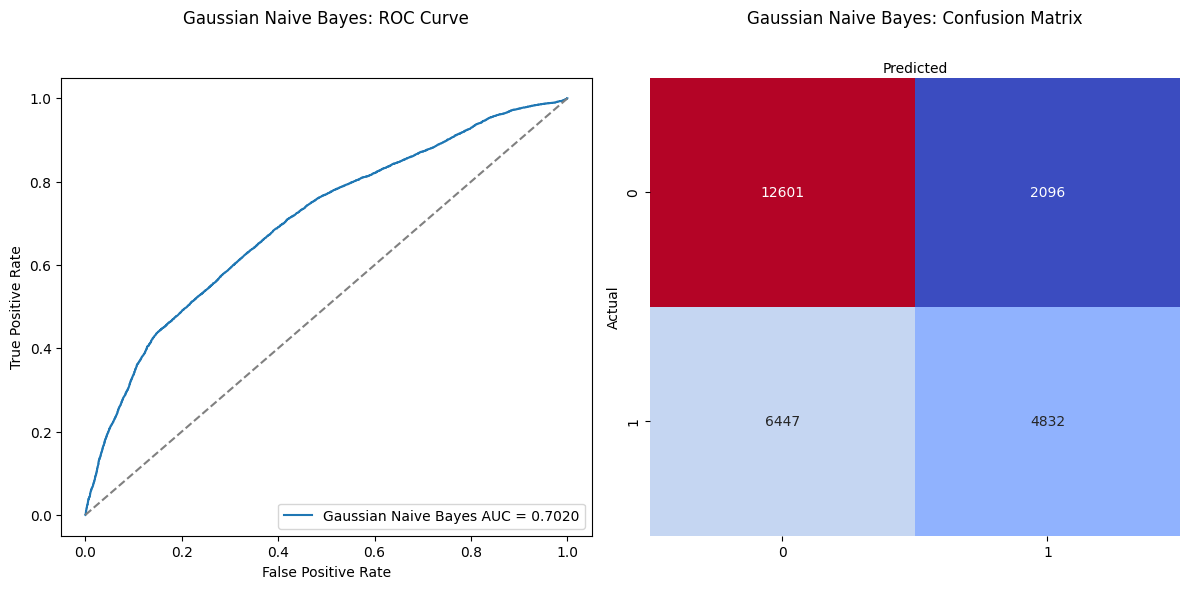


Multinomial Naive Bayes Results: 

Model Accuracy: 0.8867 

RMSE: 0.3366
Confusion Matrix: 
 [[13180  1517]
 [ 1426  9853]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     14697
           1       0.87      0.87      0.87     11279

    accuracy                           0.89     25976
   macro avg       0.88      0.89      0.88     25976
weighted avg       0.89      0.89      0.89     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.88593317 0.88647213 0.88889744 0.88512473 0.88562519] 

Mean Cross-Validation Accuracy: 0.8864 ± 0.0013 



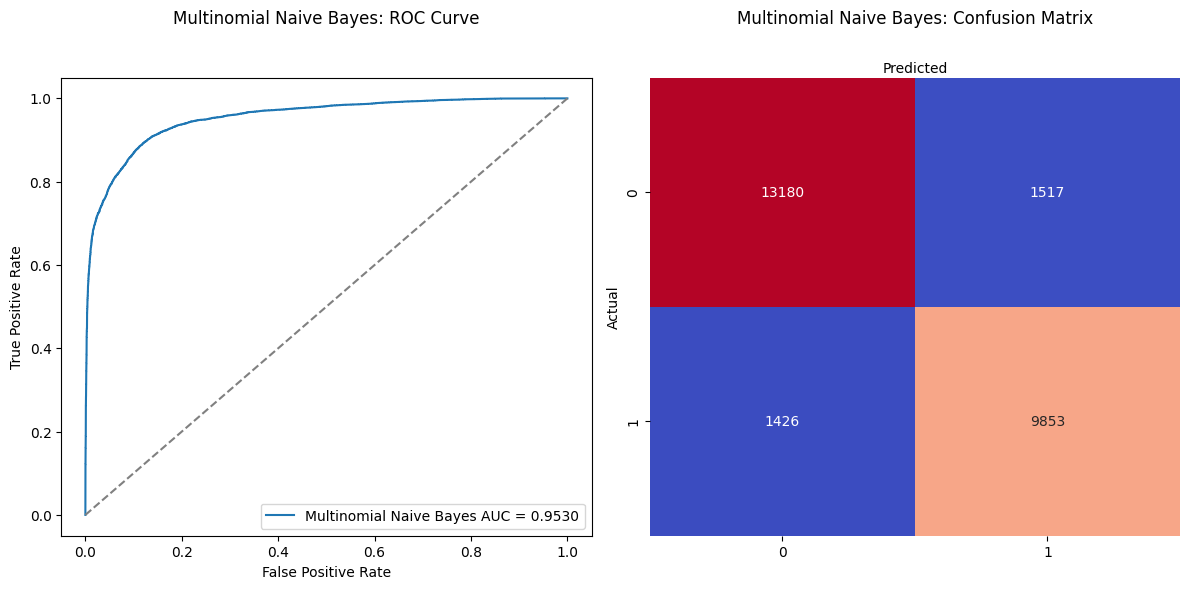


Logistic Regression Results: 

Model Accuracy: 0.9324 

RMSE: 0.2599
Confusion Matrix: 
 [[13929   768]
 [  987 10292]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     14697
           1       0.93      0.91      0.92     11279

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976
 

Logistic Regression Coefficients: 
 [[-2.50776656e-01 -1.78780535e-01 -1.86731876e+00  1.43776157e+00
   1.89186955e+00 -2.32142675e+00  3.51407394e-01 -2.68770211e-01
  -5.12194375e-01 -5.98139813e-02  4.05685899e-01  4.40637828e-01
   3.01329526e-01 -6.52807795e-01 -8.64588668e-01 -1.21739671e+00
  -3.40124731e-01 -2.73922137e-01  1.48557331e-01  9.62740869e-01
   2.90588190e-01 -1.36604698e-01 -6.48939450e-01 -4.80179713e-01
   5.90490267e-02 -3.85184806e-03  7.80969492e-01  7.08035852e-01
  -1.07748448e+00 -9.7841

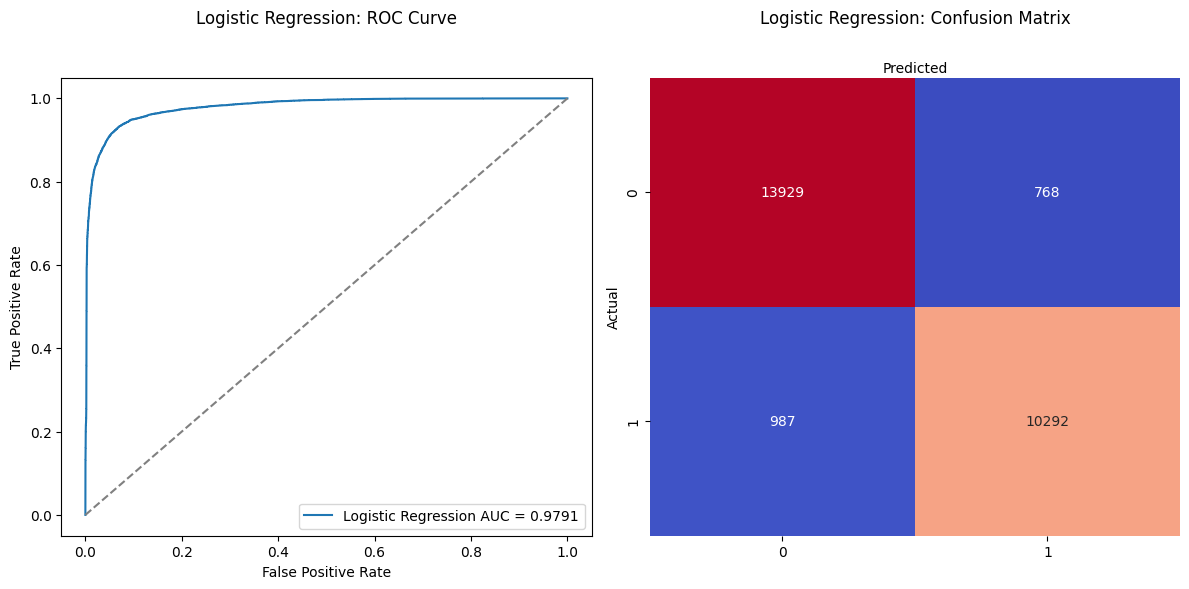


Decision Tree Results: 

Model Accuracy: 0.9429 

RMSE: 0.2389
Confusion Matrix: 
 [[13940   757]
 [  725 10554]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14697
           1       0.93      0.94      0.93     11279

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.94722051 0.94302433 0.94718201 0.9434093  0.9447182 ] 

Mean Cross-Validation Accuracy: 0.9451 ± 0.0018 



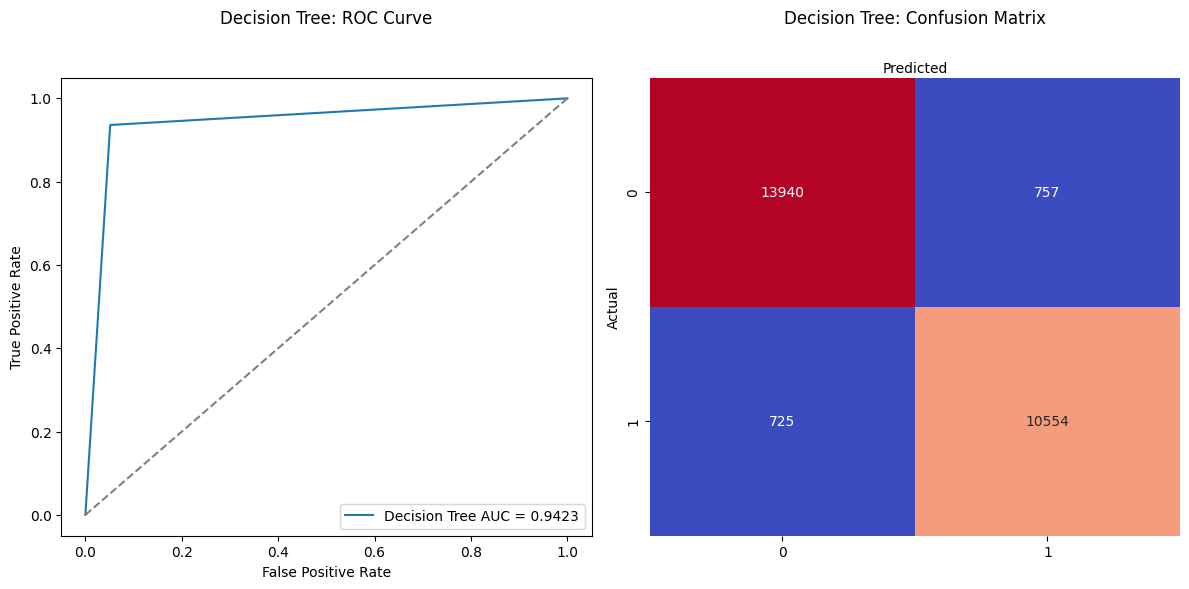


Random Forest Results: 

Model Accuracy: 0.9620 

RMSE: 0.1948
Confusion Matrix: 
 [[14391   306]
 [  680 10599]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14697
           1       0.97      0.94      0.96     11279

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 

Random Forest Feature Importances: 
 80    6.764979e-02
6     6.549186e-02
4     6.504504e-02
5     5.691643e-02
32    5.583678e-02
          ...     
33    7.226051e-06
39    5.112183e-06
69    2.204592e-06
21    1.372789e-06
45    8.911131e-07
Length: 92, dtype: float64 



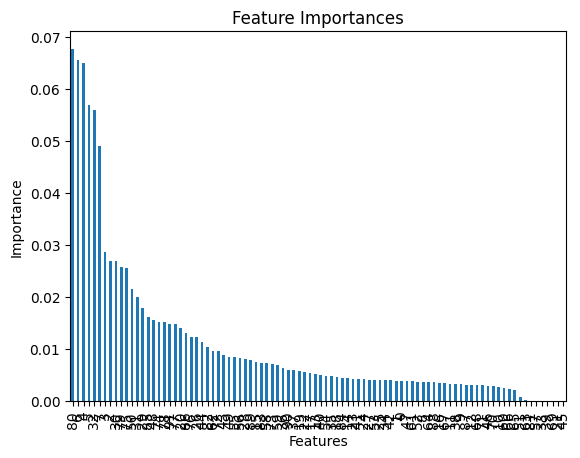


Stratified K-Fold Accuracy Scores: 
 [0.96119495 0.960502   0.96246535 0.95961657 0.95969356] 

Mean Cross-Validation Accuracy: 0.9607 ± 0.0011 



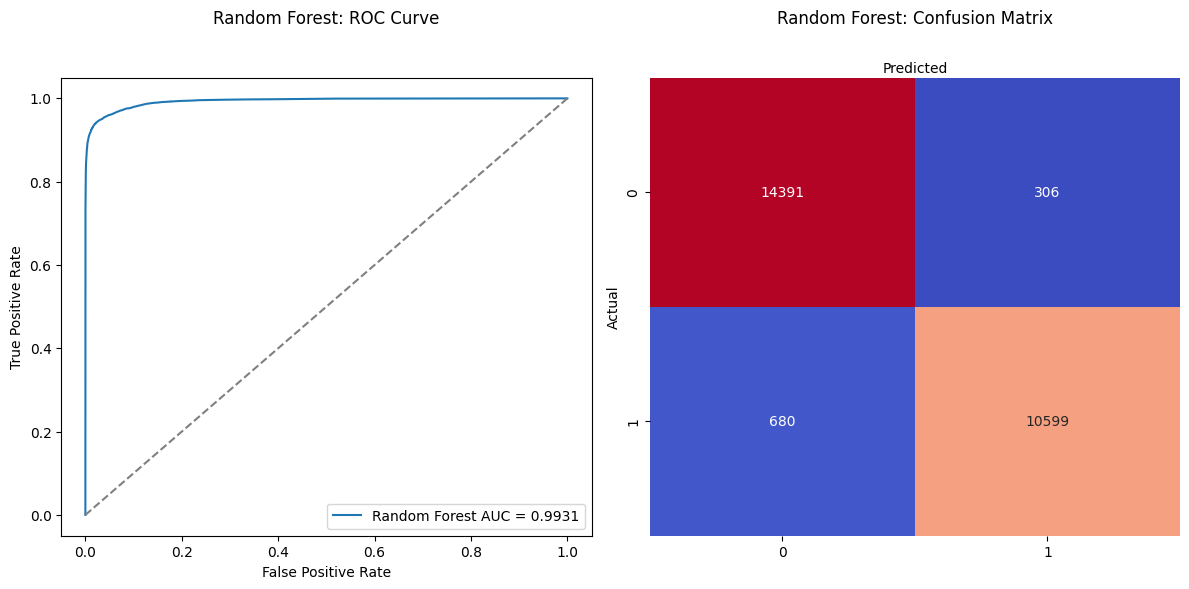

In [ ]:
# Loop over each model and evaluate
for model_name, model in models.items():

    if model_name == 'Linear Discriminant Analysis':
        preprocessor = preprocessor_num
        X_train = X_train_num
        X_test = X_test_num
        y_train = y_train_num
        y_test = y_test_num

    if model_name == 'Quadratic Discriminant Analysis':
        preprocessor = preprocessor_num
        X_train = X_train_num
        X_test = X_test_num
        y_train = y_train_num
        y_test = y_test_num

    if model_name == 'Gaussian Naive Bayes':
        preprocessor = preprocessor_num
        X_train = X_train_num
        X_test = X_test_num
        y_train = y_train_num
        y_test = y_test_num

    if model_name == 'Multinomial Naive Bayes':
        preprocessor = preprocessor_cat
        X_train = X_train_cat
        X_test = X_test_cat
        y_train = y_train_cat
        y_test = y_test_cat

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Results: \n")
    print(f"Model Accuracy: {accuracy:.4f} \n")

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.4f}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: \n {cm} \n")

    # Classification report
    print(f"Classification Report: \n {classification_report(y_test, y_pred)} \n")

    # Logistic regression coefficients
    if model_name == 'Logistic Regression':
        print(f"Logistic Regression Coefficients: \n {pipeline.named_steps['classifier'].coef_} \n")

    # Random forest feature importances
    if model_name == 'Random Forest':
        # Plot and print feature importances
        feature_importances = pd.Series(pipeline.named_steps['classifier'].feature_importances_).sort_values(ascending=False)
        print(f"Random Forest Feature Importances: \n {feature_importances} \n")
        feature_importances.plot.bar()
        plt.title('Feature Importances')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()

    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    skf_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
    print(f"\nStratified K-Fold Accuracy Scores: \n {skf_scores} \n")
    print(f"Mean Cross-Validation Accuracy: {skf_scores.mean():.4f} ± {skf_scores.std():.4f} \n")

    # Plot the ROC Curve
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    y_pred_proba = pipeline.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    axes[0].plot(fpr, tpr, label=f"{model_name} AUC = {auc:.4f}")
    axes[0].set_title(f'{model_name}: ROC Curve', y=1.1)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend(loc=4)
    axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Plot the Confusion Matrix
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm", fmt='g', ax=axes[1], cbar=False)
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    axes[1].set_title(f'{model_name}: Confusion Matrix', y=1.1)
    axes[1].xaxis.set_label_position('top')
    plt.tight_layout()
    plt.show()

In [ ]:
# We will do cross validation using randomized search to find the best hyperparameters
from scipy.stats import randint, uniform

# Define the parameter
param_dist = {'n_estimators': randint(100, 500),
              'max_depth': randint(1, 50),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10)}

# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(rf,
                            param_distributions = param_dist,
                            cv=5,
                            n_iter=50,
                            scoring='accuracy',
                            verbose=2,
                            n_jobs=-1,
                            random_state=42)

# Create a new pipeline for our random search
pipeline_random = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', random_search)])

# Fit the random search object to the data
pipeline_random.fit(X_train, y_train)

# Print the best parameters and best accuracy
print(f"Best Parameters: {pipeline_random.named_steps['classifier'].best_params_}")
print(f"Best Model Accuracy: {pipeline_random.named_steps['classifier'].best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}
Best Model Accuracy: 0.9607810968216646



Random Forest Results: 

Model Accuracy: 0.9622 

Confusion Matrix: 
 [[14391   306]
 [  675 10604]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14697
           1       0.97      0.94      0.96     11279

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 


Stratified K-Fold Accuracy Scores: 
 [0.96146443 0.95950108 0.96300431 0.95900062 0.95934709] 

Mean Cross-Validation Accuracy: 0.9605 ± 0.0015 



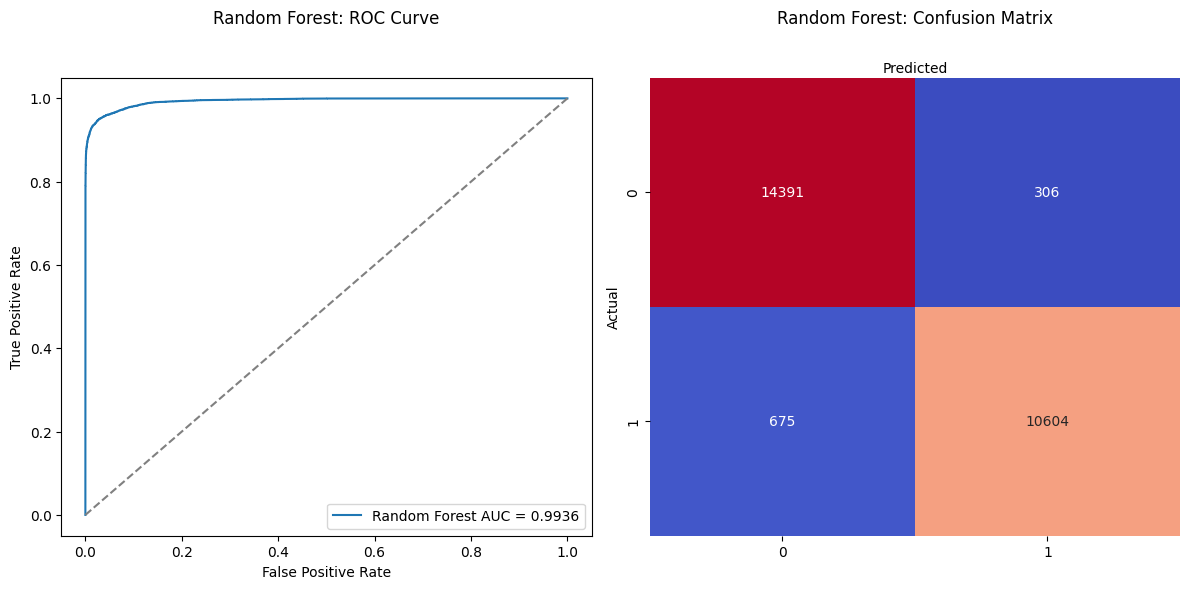

In [ ]:
# Create a new model using the best RF hyperparameters
rf_params = pipeline_random.named_steps['classifier'].best_params_

rf_best = RandomForestClassifier(**rf_params)

pipeline_best = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', rf_best)])

pipeline_best.fit(X_train, y_train)
y_pred = pipeline_best.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{model_name} Results: \n")
print(f"Model Accuracy: {accuracy:.4f} \n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n {cm} \n")

# Classification report
print(f"Classification Report: \n {classification_report(y_test, y_pred)} \n")

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
print(f"\nStratified K-Fold Accuracy Scores: \n {skf_scores} \n")
print(f"Mean Cross-Validation Accuracy: {skf_scores.mean():.4f} ± {skf_scores.std():.4f} \n")

# Plot the ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
y_pred_proba = pipeline_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, label=f"{model_name} AUC = {auc:.4f}")
axes[0].set_title(f'{model_name}: ROC Curve', y=1.1)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc=4)
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot the Confusion Matrix
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm", fmt='g', ax=axes[1], cbar=False)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title(f'{model_name}: Confusion Matrix', y=1.1)
axes[1].xaxis.set_label_position('top')
plt.tight_layout()
plt.show()